In [1]:
import xml.etree.cElementTree as ET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Check the number of records
1) Print 1st record full
2a) Get tags for 1st, 2nd, and 3rd depths for all records #Optional
2b) Check parent of KeywordList for all records #Optional

I can plot top publishers from OhioUniv and in cancer field.
I can groupby Grant number to compute publications per grant. It appears that single publication can be linked to multiple grant id's.
1st graph (number of publications per university for top 10 universities, pie chart) DONE
2nd graph (number of publications per university for top 10 universities, pool the keywords and top 10 keywords) OR
2nd graph (number of publications per university for top 10 universities, in 5 fields - cancer, NGS, data science, alzheimers,diabetes) DONE OR
2nd graph (top 5 grants and number of publications) DONE

In [ ]:
eventcount=0
artcount=0
artopen=0
articlesTag=[]
for event,elem in ET.iterparse('DataScience/pubmedJanToM.xml',events=('start','start-ns','end','end-ns')):
    eventcount=eventcount+1
    if (event=='start' or event=='start-ns') and eventcount==1:
        roottag=elem.tag
    elif (event=='start' or event=='start-ns') and artopen==0:
        arttag=elem.tag
        artopen=1
        articlesTag.append(arttag)
    elif (event=='end' or event=='end-ns') and elem.tag==arttag:
        artcount=artcount+1
        artopen=0
        arttag=''
    elem.clear()

print(eventcount,roottag,arttag)
print(len(articlesTag))
set(articlesTag)

In [80]:
artcount=0
idfound=0
for event,elem in ET.iterparse('DataScience/pubmedJanToM.xml'):
    if elem.tag=='GrantID':
        idfound=1
    
    if elem.tag=='PubmedArticle' and idfound==1:
        break
        
    if elem.tag=='PubmedArticle' and idfound==0:
        elem.clear()
    

print(ET.tostring(elem, encoding='utf8').decode('utf8'))

<?xml version='1.0' encoding='utf8'?>
<PubmedArticle>
    <MedlineCitation Owner="NLM" Status="In-Process">
        <PMID Version="1">29534793</PMID>
        <DateRevised>
            <Year>2018</Year>
            <Month>04</Month>
            <Day>01</Day>
        </DateRevised>
        <Article PubModel="Print-Electronic">
            <Journal>
                <ISSN IssnType="Electronic">1873-4324</ISSN>
                <JournalIssue CitedMedium="Internet">
                    <Volume>1017</Volume>
                    <PubDate>
                        <Year>2018</Year>
                        <Month>Aug</Month>
                        <Day>09</Day>
                    </PubDate>
                </JournalIssue>
                <Title>Analytica chimica acta</Title>
                <ISOAbbreviation>Anal. Chim. Acta</ISOAbbreviation>
            </Journal>
            <ArticleTitle>A competitive lateral flow assay for the detection of tenofovir.</ArticleTitle>
            <Pagination>
  

In [ ]:
eventcount=0
artopen=0
articlesTag=[]
for event,elem in ET.iterparse('DataScience/pubmedJanToM.xml', events=("start","end")):
    eventcount=eventcount+1
    if event=='start' and eventcount==1:
        roottag=elem.tag
        elem.clear()
    elif event=='start' and artopen==0:
        arttag=elem.tag
        artopen=1
        articlesTag.append(arttag)
        elem.clear()
    elif event=='end' and elem.tag==arttag:
        artopen=0
        arttag=''
        elem.clear()
    elem.clear()

print(eventcount,roottag,arttag)

In [ ]:
print(len(articlesTag))
set(articlesTag)

The cell below took 4 mins to run

In [2]:
artind=1

authno=1
authorlist=[]
firstname=None
lastname=None
affiliation=None

grantno=1
grantidlist=[]

keywordno=1
keywordslist=[]

for event,elem in ET.iterparse('DataScience/pubmedJanToM.xml'):
    if elem.tag=='PubmedArticle':
        artind=artind+1
        authno=1
        grantno=1
        keywordno=1
        elem.clear()
        
    if elem.tag=='Author':
        if elem.find('ForeName') is not None:
            firstname=elem.find('ForeName').text
        if elem.find('LastName') is not None:
            lastname=elem.find('LastName').text
        if elem.find('AffiliationInfo') is not None:
            affiliation=elem.find('AffiliationInfo').find('Affiliation').text
        authorlist.append({'artind': artind, 'authno': authno, 'FirstName': firstname, 'LastName': lastname, 'affiliation': affiliation})
        authno=authno+1
        firstname=None
        lastname=None
        affiliation=None
        
    if elem.tag=='GrantID':
        grantidlist.append({'artind': artind, 'grantno': grantno, 'grantid': elem.text})
        grantno=grantno+1
    
    if elem.tag=='Keyword':
        keywordslist.append({'artind': artind, 'keywordno': keywordno, 'keyword': elem.text})
        keywordno=keywordno+1
    

In [14]:
keywordslistDF=pd.DataFrame(keywordslist).set_index('artind')
authorlistDF=pd.DataFrame(authorlist).set_index('artind')
grantidlistDF=pd.DataFrame(grantidlist).set_index('artind')

In [94]:
TotRecordskeyW=len(set(keywordslistDF.index))
TotRecordsAuth=len(set(authorlistDF.index))
len(set(authorlistDF.index)),len(set(keywordslistDF.index)),len(set(grantidlistDF.index))

(368274, 249352, 39011)

In [20]:
keywordslistDF.head()

,keyword,keywordno
artind,,
1,Reactive oxygen species,1
1,antioxidant enzymes,2
1,apoptosis,3
1,chemical agents,4
1,diet,5


In [21]:
authorlistDF.head()

,FirstName,LastName,affiliation,authno
artind,,,,
1,Kaitlyn,Beyfuss,"a School of Kinesiology and Health Sciences , ...",1
1,David A,Hood,"a School of Kinesiology and Health Sciences , ...",2
2,Shan-Shan,Hong,"a Obstetrics and Gynecology Hospital , Fudan U...",1
2,Ming-Xing,Zhang,"a Obstetrics and Gynecology Hospital , Fudan U...",2
2,Meng,Zhang,"a Obstetrics and Gynecology Hospital , Fudan U...",3


In [22]:
grantidlistDF.head()

,grantid,grantno
artind,,
168,U54 EB015403,1
168,UL1 TR001430,2
183,K23 HL128885,1
183,L40 HL124407,2
183,U01 HL133883,3


In [15]:
UnivNames=pd.read_csv('DataScience/timesData.csv')
UnivNamesUS=UnivNames.loc[UnivNames['country']=='United States of America','university_name']
UnivNamesUS.iloc[0:10]

0                        Harvard University
1        California Institute of Technology
2     Massachusetts Institute of Technology
3                       Stanford University
4                      Princeton University
7        University of California, Berkeley
9                           Yale University
10    University of California, Los Angeles
11                    University of Chicago
12                 Johns Hopkins University
Name: university_name, dtype: object

In [99]:
UnivNamesChina=UnivNames.loc[UnivNames['country']=='China','university_name']
UnivNamesChina.iloc[0:10]

36                                 Peking University
49     University of Science and Technology of China
57                               Tsinghua University
119                               Nanjing University
170                           Sun Yat-sen University
197                              Zhejiang University
249                                Peking University
270                              Tsinghua University
391    University of Science and Technology of China
433                                 Fudan University
Name: university_name, dtype: object

In [109]:
UnivNamesIndia=UnivNames.loc[UnivNames['country']=='India','university_name']
UnivNamesJapan=UnivNames.loc[UnivNames['country']=='Japan','university_name']
UnivNamesKorea=UnivNames.loc[UnivNames['country']=='Korea','university_name']
UnivNamesIndia.iloc[0:10],UnivNamesUS.count(),UnivNamesChina.count(),UnivNamesIndia.count(),UnivNamesJapan.count()

(510        Indian Institute of Technology Bombay
 832     Indian Institute of Technology Kharagpur
 856        Indian Institute of Technology Bombay
 959       Indian Institute of Technology Roorkee
 1232                           Panjab University
 1360        Indian Institute of Technology Delhi
 1361       Indian Institute of Technology Kanpur
 1362    Indian Institute of Technology Kharagpur
 1363      Indian Institute of Technology Roorkee
 1679                 Indian Institute of Science
 Name: university_name, dtype: object, 659, 83, 30, 98)

Number of publications for top 10 universities

In [16]:
TotPubsPerUniv=[len(set(authorlistDF[authorlistDF.affiliation.str.contains(univ)==True].index)) for univ in UnivNamesUS.iloc[0:10]]

In [100]:
TotPubsPerUnivChina=[len(set(authorlistDF[authorlistDF.affiliation.str.contains(univ)==True].index)) for univ in UnivNamesChina.iloc[0:10]]

In [103]:
TotPubsPerUnivIndia=[len(set(authorlistDF[authorlistDF.affiliation.str.contains(univ)==True].index)) for univ in UnivNamesIndia.iloc[0:10]]

In [110]:
TotPubsPerUnivJapan=[len(set(authorlistDF[authorlistDF.affiliation.str.contains(univ)==True].index)) for univ in UnivNamesJapan.iloc[0:10]]

[773, 222, 654, 2386, 297, 649, 1430, 947, 1199, 2427]


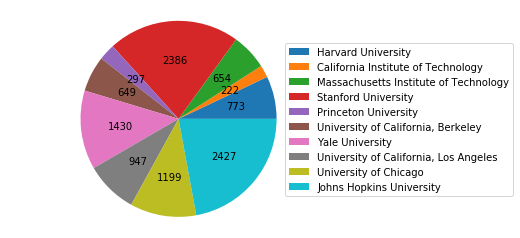

In [61]:
print(TotPubsPerUniv)
def absolute_value(val):
    a  = int(round(val*sum(TotPubsPerUniv)/100))
    return a

#plt.pie(TotPubsPerUniv,labels=UnivNamesUS.iloc[0:10],autopct=absolute_value)
pie = plt.pie(TotPubsPerUniv,autopct=absolute_value)
plt.axis('equal')
plt.legend(pie[0],UnivNamesUS.iloc[0:10], bbox_to_anchor=(1.3,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [111]:
sum(np.array(TotPubsPerUniv)*100/TotRecordsAuth),sum(np.array(TotPubsPerUnivChina)*100/TotRecordsAuth),sum(np.array(TotPubsPerUnivIndia)*100/TotRecordsAuth),sum(np.array(TotPubsPerUnivJapan)*100/TotRecordsAuth)

(2.9825618968485426, 3.51640354735876, 0.25877471665118906, 2.640425335483906)

Number of publications for specific research fields

In [25]:
keywordOfInt=['cancer','alzheimer','hiv','diabetes','autism','machine learning','neural networks','deep learning']

In [32]:
TotPubsPerKWOfInt=[len(set(keywordslistDF[keywordslistDF.keyword.str.lower().str.contains(keyw)==True].index)) for keyw in keywordOfInt]
TotPubsPerKWOfInt

[15491, 1774, 2002, 4121, 818, 471, 183, 163]

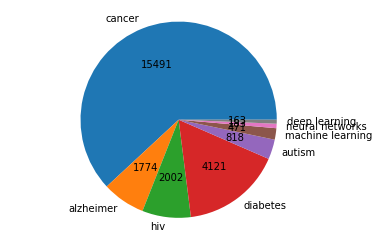

In [35]:
def absolute_value(val):
    a  = int(round(val*sum(TotPubsPerKWOfInt)/100))
    return a

plt.pie(TotPubsPerKWOfInt,labels=keywordOfInt,autopct=absolute_value)#'%1.1f%%')
plt.axis('equal')
plt.show()

Number of publications for specific research fields as a function of university

In [34]:
PubindSetPerUniv=[set(authorlistDF[authorlistDF.affiliation.str.contains(univ)==True].index) for univ in UnivNamesUS.iloc[0:10]]

In [36]:
PubindSetPerKWOfInt=[set(keywordslistDF[keywordslistDF.keyword.str.lower().str.contains(keyw)==True].index) for keyw in keywordOfInt]

In [40]:
TotPubsPerKWOfIntPerUniv=[len(PubindSetPerKWOfInt[i] & PubindSetPerUniv[j]) for i in range(len(keywordOfInt)) for j in range(10)]

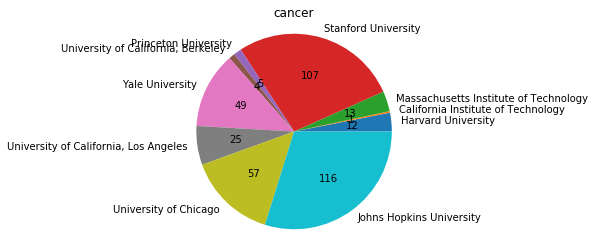

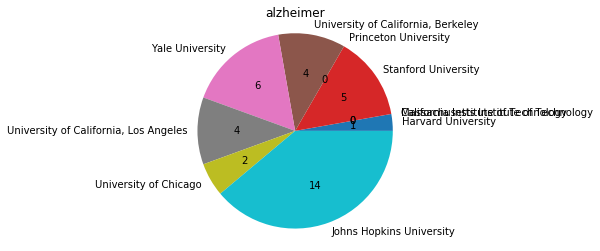

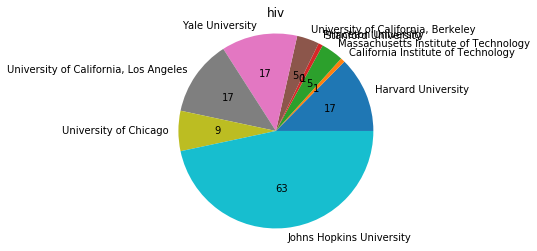

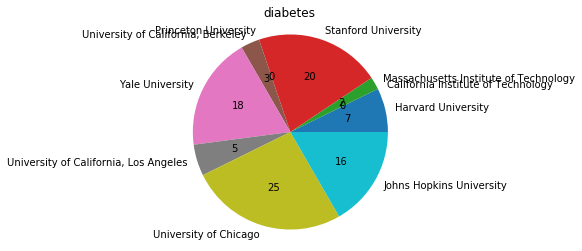

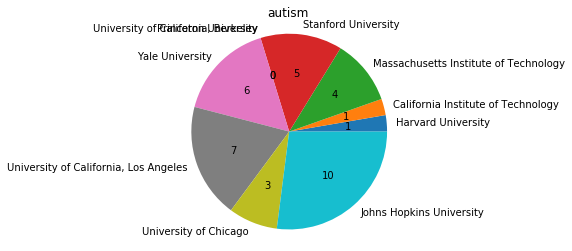

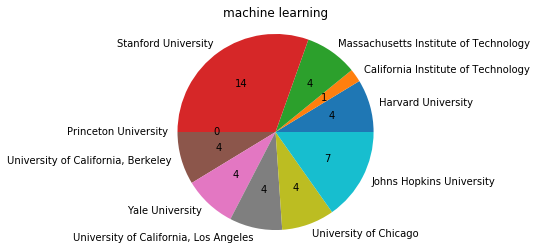

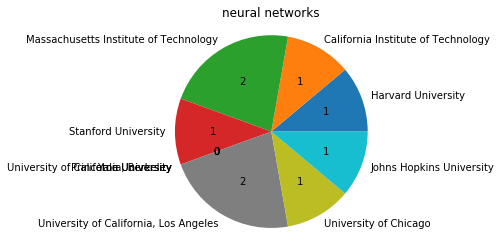

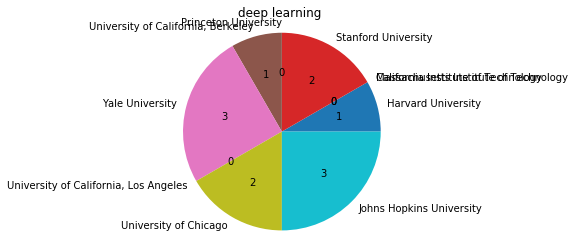

In [48]:
def absolute_value(val):
    a  = int(round(val*sum(TotPubsPerKWOfIntPerUniv[i:j])/100))
    return a

for c in range(0,len(keywordOfInt)):
    i=c*10
    j=i+10
    plt.pie(TotPubsPerKWOfIntPerUniv[i:j],labels=UnivNamesUS.iloc[0:10],autopct=absolute_value)#'%1.1f%%')
    plt.axis('equal')
    plt.title(keywordOfInt[c])
    plt.show()

Top 5 grants in terms of publications

In [66]:
TotPubsPerGrant=grantidlistDF.reset_index().groupby('grantid').agg({'artind': lambda x: len(set(x))}).rename(columns={'artind': 'TotNoOfPubs'}).sort_values(by='TotNoOfPubs',ascending=False).loc[:,'TotNoOfPubs']

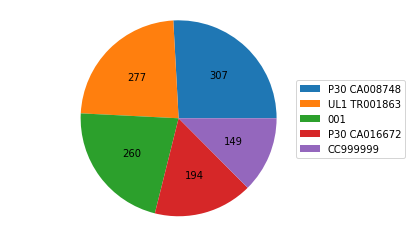

In [79]:
def absolute_value(val):
    a  = int(round(val*sum(TotPubsPerGrant.values[0:5])/100))
    return a

#plt.pie(TotPubsPerUniv,labels=UnivNamesUS.iloc[0:10],autopct=absolute_value)
pie = plt.pie(TotPubsPerGrant.values[0:5],autopct=absolute_value)
plt.axis('equal')
plt.legend(pie[0],list(TotPubsPerGrant.index)[0:5], bbox_to_anchor=(1.05,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.show()